In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [36]:
imputer = SimpleImputer(strategy='mean')
df[['age', 'bmi', 'children', 'charges']] = imputer.fit_transform(df[['age', 'bmi', 'children', 'charges']])

In [38]:
label_encoder_sex = LabelEncoder()
label_encoder_smoker = LabelEncoder()
label_encoder_region = LabelEncoder()
data['sex'] = label_encoder_sex.fit_transform(data['sex'])
data['smoker'] = label_encoder_smoker.fit_transform(data['smoker'])
data['region'] = label_encoder_region.fit_transform(data['region'])

In [40]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

In [42]:
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

D:\Tool File\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [50]:
N_EPOCHS = 100
BATCH_SIZE = 32
history = model.fit(
    X_train, y_train,
    epochs=N_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.8502 - mae: 0.6560 - val_loss: 0.4478 - val_mae: 0.4111
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3955 - mae: 0.4207 - val_loss: 0.2362 - val_mae: 0.3006
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2408 - mae: 0.3133 - val_loss: 0.1747 - val_mae: 0.2675
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1836 - mae: 0.2708 - val_loss: 0.1560 - val_mae: 0.2198
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1548 - mae: 0.2402 - val_loss: 0.1376 - val_mae: 0.2166
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1437 - mae: 0.2375 - val_loss: 0.1380 - val_mae: 0.2014
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1654 - mae: 0.2314 - val_loss: 0.1359 - val_mae: 0.2108
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1430 - mae: 0.2317 - val_loss: 0.1388 - val_mae: 0.2438
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.14

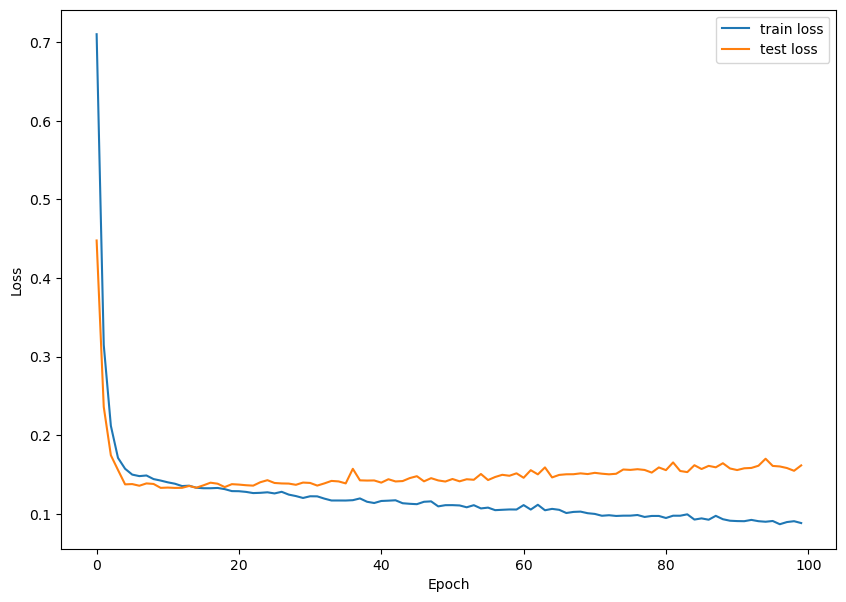

In [56]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [58]:
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1429 - mae: 0.2181 


[0.16174867749214172, 0.23577892780303955]